<a href="https://colab.research.google.com/github/quaea/margins-interactions/blob/main/margins-interactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting models and interpreting results

In this notebook, we study marginal and interaction effects for categorical and continuous covariates

## Load and describe the data

In [ ]:
use "https://github.com/quarcs-lab/data-open/raw/master/nhanes/nhanes_clean.dta", clear

(Fictitious data based on the National Health and Nutrition Examination Survey)


In [ ]:
describe


Contains data from https://github.com/quarcs-lab/data-open/raw/master/nhanes/nha
> nes_clean.dta
  obs:         1,267                          Fictitious data based on the
                                                National Health and Nutrition
                                                Examination Survey
 vars:            21                          9 Feb 2016 17:24
                                              (_dta has notes)
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              str6    %9s                   Identification Number
age             byte    %10.0g                Age (years)
sex             byte    %9.0g      SexLabel   Sex
race            byte    %8.0g      race_n     Race
height          float   %9.0g                 height (cm)
weight 

In [ ]:
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
          id |          0
         age |      1,266    48.44076    16.98858         20         74
         sex |      1,267    .4664562    .4990705          0          1
        race |      1,267    2.704815    .6973209          1          3
      height |      1,266    167.1308     9.61487    144.199    193.398
-------------+---------------------------------------------------------
      weight |      1,266    72.17252    16.28185      39.12     175.88
         sbp |      1,267    130.6843    24.34302         65        254
         dbp |      1,267    80.54854    13.99187         35        150
 cholesterol |      1,267    216.4917    46.86525         89        426
triglyceri~s |        633    140.7962    89.34762         40       1191
-------------+---------------------------------------------------------
         hdl |      1,080    50.16019

## Distribution the dependent variable

(bin=31, start=65, width=6.0967742)


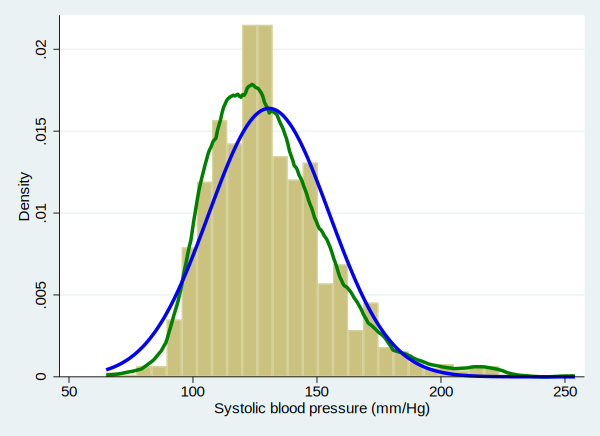

In [ ]:
histogram sbp, normal   normopts(lcolor(blue)  lwidth(thick)) ///
               kdensity kdenopts(lcolor(green) lwidth(thick))

## Regression with one continuous covariate

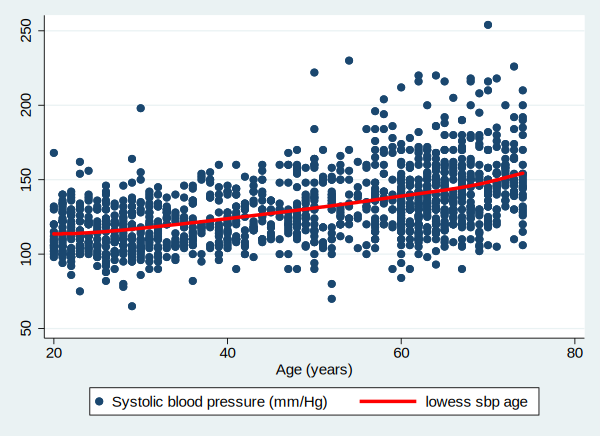

In [ ]:
twoway (scatter sbp age) ///
        (lowess sbp age, lcolor(red) lwidth(thick))

The relationship seems linear

In [ ]:
reg sbp age


      Source |       SS           df       MS      Number of obs   =     1,266
-------------+----------------------------------   F(1, 1264)      =    445.18
       Model |  195206.733         1  195206.733   Prob > F        =    0.0000
    Residual |  554256.247     1,264  438.493866   R-squared       =    0.2605
-------------+----------------------------------   Adj R-squared   =    0.2599
       Total |   749462.98     1,265  592.460854   Root MSE        =     20.94

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   .7312149   .0346561    21.10   0.000     .6632251    .7992046
       _cons |   95.24211   1.778938    53.54   0.000     91.75212    98.73211
------------------------------------------------------------------------------


On average, SBP is 0.73 mm/Hg higher for each additional year of age.
(On average, when `year` increases by one unit, `sbp` increases by 0.73 units)

Let's use factor variable notation

In [ ]:
reg sbp c.age


      Source |       SS           df       MS      Number of obs   =     1,266
-------------+----------------------------------   F(1, 1264)      =    445.18
       Model |  195206.733         1  195206.733   Prob > F        =    0.0000
    Residual |  554256.247     1,264  438.493866   R-squared       =    0.2605
-------------+----------------------------------   Adj R-squared   =    0.2599
       Total |   749462.98     1,265  592.460854   Root MSE        =     20.94

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   .7312149   .0346561    21.10   0.000     .6632251    .7992046
       _cons |   95.24211   1.778938    53.54   0.000     91.75212    98.73211
------------------------------------------------------------------------------


In this case, the use of factor variable notation is irrelevant

### Adjusted predictions using the `margins` and `marginsplot` commands




Adjusted predictions                            Number of obs     =      1,266
Model VCE    : OLS

Expression   : Linear prediction, predict()

1._at        : age             =          20

2._at        : age             =          30

3._at        : age             =          40

4._at        : age             =          50

5._at        : age             =          60

6._at        : age             =          70

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         _at |
          1  |   109.8664    1.14798    95.70   0.000     107.6143    112.1186
          2  |   117.1786   .8687868   134.88   0.000     115.4741     118.883
          3  |   124.4907   .6572151   189.42   0.000     123.2014    125.7801
          4  |   131.8029   .5910006   223.02   0

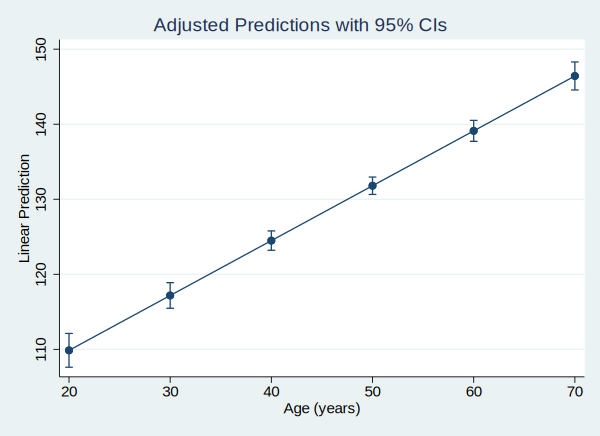




  Variables that uniquely identify margins: age


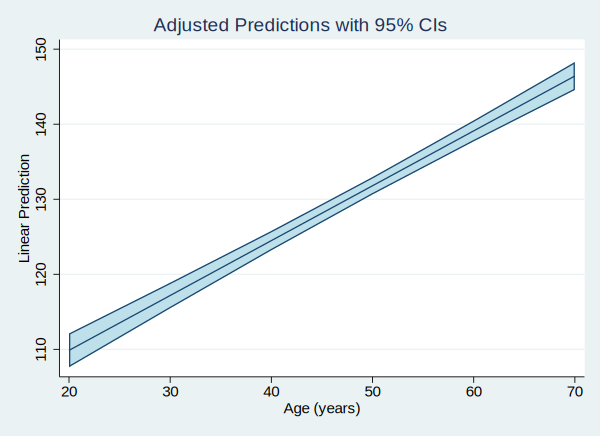

In [ ]:
quietly regress sbp age
margins, at(age=(20(10)70))
marginsplot
marginsplot, recast(line) recastci(rarea) ciopts(fcolor(ltblue))

## Regression with one binary covariate

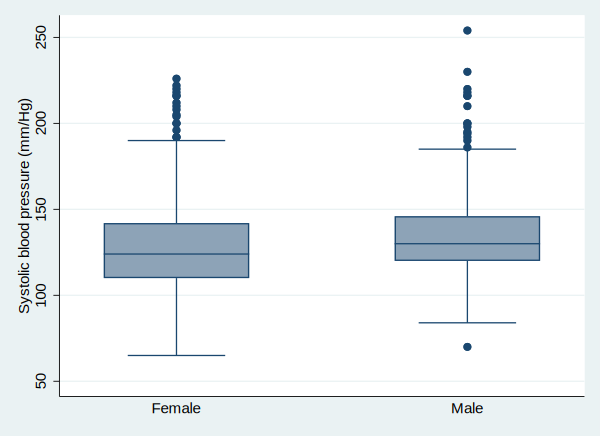

In [ ]:
graph box sbp, over(sex)

Males tend to have higher `sbp`.

> In the dataset, females are coded “0” and males are coded “1”. Thus, in a regression, females will be the benchmark category.

In [ ]:
reg sbp sex


      Source |       SS           df       MS      Number of obs   =     1,267
-------------+----------------------------------   F(1, 1265)      =     13.85
       Model |  8124.53576         1  8124.53576   Prob > F        =    0.0002
    Residual |  742085.182     1,265  586.628602   R-squared       =    0.0108
-------------+----------------------------------   Adj R-squared   =    0.0100
       Total |  750209.717     1,266  592.582715   Root MSE        =     24.22

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         sex |   5.075987   1.363964     3.72   0.000     2.400107    7.751867
       _cons |   128.3166   .9315545   137.74   0.000      126.489    130.1441
------------------------------------------------------------------------------


On average, `sbp` for females is 128.3  and the `sbp` for males is 5.1 mm/Hg higher than females.

### Factor variable notation

The `i.` operator in front of the variable sex specifies that sex is a categorical variable. Stata will automatically create indicator variables for sex and label them in the output.

In [ ]:
list sex i.sex in 1/10


     +--------------------+
     |            0.    1.|
     |    sex   sex   sex |
     |--------------------|
  1. |   Male     0     1 |
  2. | Female     1     0 |
  3. |   Male     0     1 |
  4. | Female     1     0 |
  5. |   Male     0     1 |
     |--------------------|
  6. | Female     1     0 |
  7. | Female     1     0 |
  8. | Female     1     0 |
  9. | Female     1     0 |
 10. |   Male     0     1 |
     +--------------------+


In [ ]:
reg sbp i.sex


      Source |       SS           df       MS      Number of obs   =     1,267
-------------+----------------------------------   F(1, 1265)      =     13.85
       Model |  8124.53576         1  8124.53576   Prob > F        =    0.0002
    Residual |  742085.182     1,265  586.628602   R-squared       =    0.0108
-------------+----------------------------------   Adj R-squared   =    0.0100
       Total |  750209.717     1,266  592.582715   Root MSE        =     24.22

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         sex |
       Male  |   5.075987   1.363964     3.72   0.000     2.400107    7.751867
       _cons |   128.3166   .9315545   137.74   0.000      126.489    130.1441
------------------------------------------------------------------------------


The factor variable notation provides an more informative label in the regression table 

### Adjusted predictions using the `margins` and `marginsplot` commands




Adjusted predictions                            Number of obs     =      1,267
Model VCE    : OLS

Expression   : Linear prediction, predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         sex |
     Female  |   128.3166   .9315545   137.74   0.000      126.489    130.1441
       Male  |   133.3926   .9962948   133.89   0.000      131.438    135.3471
------------------------------------------------------------------------------


  Variables that uniquely identify margins: sex


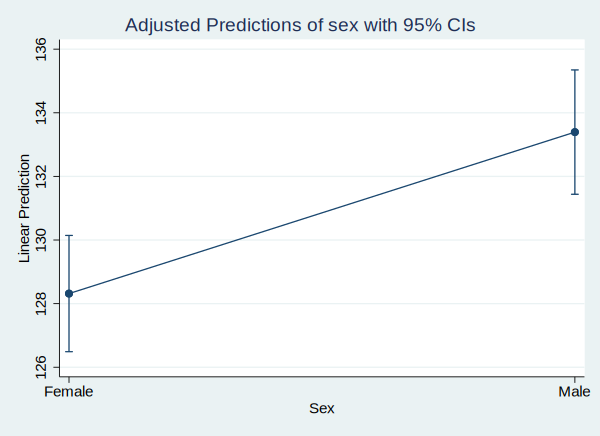




  Variables that uniquely identify margins: sex


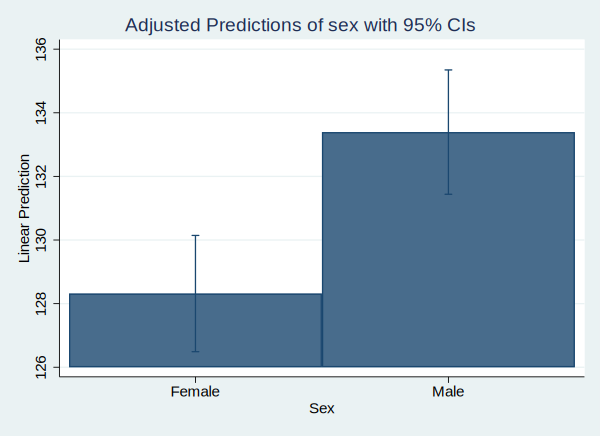

In [ ]:
quietly reg sbp i.sex
margins sex
marginsplot
marginsplot, recast(bar)

The regression model predicts that the average sbp for females is 128.3 and the average sbp for males is 133.4. Moreover, the difference between females and males is statistically significant

## Regression with one categorical covariate

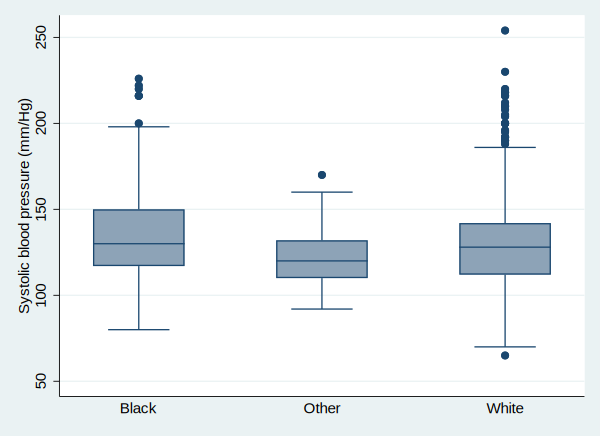

In [ ]:
graph box sbp, over(race)

In [ ]:
reg sbp i.race


      Source |       SS           df       MS      Number of obs   =     1,267
-------------+----------------------------------   F(2, 1264)      =      3.95
       Model |  4656.49666         2  2328.24833   Prob > F        =    0.0195
    Residual |  745553.221     1,264  589.836409   R-squared       =    0.0062
-------------+----------------------------------   Adj R-squared   =    0.0046
       Total |  750209.717     1,266  592.582715   Root MSE        =    24.287

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        race |
      Other  |  -10.94886   5.492002    -1.99   0.046    -21.72331   -.1744199
      White  |  -4.936873   1.975628    -2.50   0.013    -8.812745   -1.061001
             |
       _cons |   135.0398   1.830667    73.77   0.000     131.4483    138.6313
--------------------

- The average sbp for the referent category “Black” is 135.03 
- The average sbp for the category "White" is 4.9 **lower** than the referent category "Black". This difference is statistically significant.
- The average sbp for the category "Other" is 10.9 **lower** than the referent category "Black". This difference is statistically significant




Adjusted predictions                            Number of obs     =      1,267
Model VCE    : OLS

Expression   : Linear prediction, predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        race |
      Black  |   135.0398   1.830667    73.77   0.000     131.4483    138.6313
      Other  |   124.0909   5.177909    23.97   0.000     113.9327    134.2492
      White  |   130.1029   .7428086   175.15   0.000     128.6456    131.5602
------------------------------------------------------------------------------


  Variables that uniquely identify margins: race


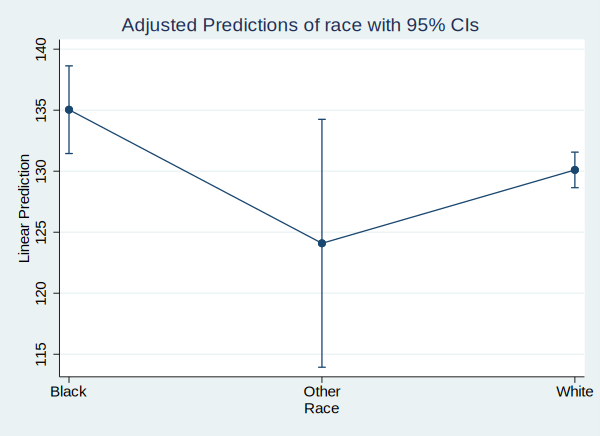




  Variables that uniquely identify margins: race


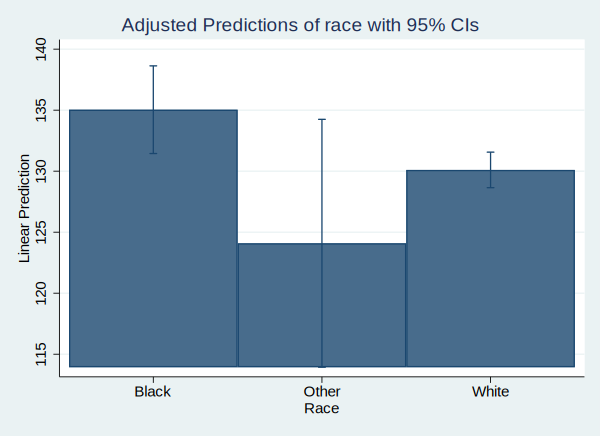

In [ ]:
quietly reg sbp i.race
margins race
marginsplot
marginsplot, recast(bar)

- The model predicts that the average sbp is 130.1 for the “White” category, 135.0 for the “Black” category, and 124.1 for the “Other” category.

- The prediction analysis suggests that there are NOT statistically significant differences among categories

### Contrasts of margins

![](https://github.com/quaea/margins-interactions/blob/main/figs/contrasts.jpg?raw=1)




Contrasts of adjusted predictions               Number of obs     =      1,267
Model VCE    : OLS

Expression   : Linear prediction, predict()

---------------------------
             |    Number of
             |  Comparisons
-------------+-------------
        race |            3
---------------------------

------------------------------------------------------------------
                 |            Delta-method          Scheffe
                 |   Contrast   Std. Err.     [95% Conf. Interval]
-----------------+------------------------------------------------
            race |
(Black vs mean)  |   5.295245   2.128324     -.6624773    11.25297
(Other vs mean)  |  -5.653618   3.514195     -15.49075    4.183509
(White vs mean)  |   .3583727   1.896463     -4.950311    5.667056
------------------------------------------------------------------


  Variables that uniquely identify margins: race


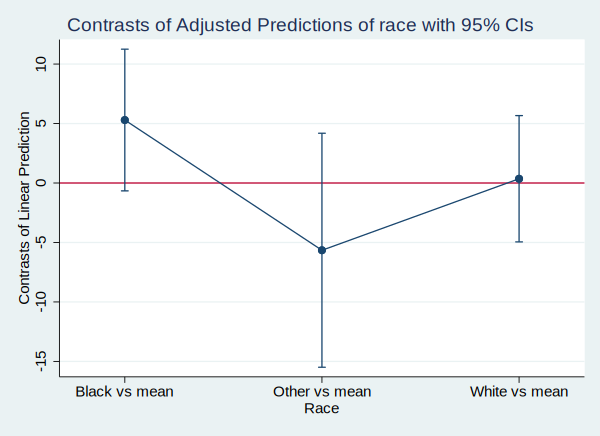

In [ ]:
quietly reg sbp i.race
margins g.race, mcompare(scheffe) contrast(nowald)
marginsplot, yline(0) plotregion(margin(l=15 r=15))

When we contrast the predicted value of each category with the mean, the differences is NOT statistically significant

### Pairwise comparisons of margins




Pairwise comparisons of adjusted predictions    Number of obs     =      1,267
Model VCE    : OLS

Expression   : Linear prediction, predict()

---------------------------
             |    Number of
             |  Comparisons
-------------+-------------
        race |            3
---------------------------

-----------------------------------------------------------------
                |            Delta-method         Bonferroni
                |   Contrast   Std. Err.     [95% Conf. Interval]
----------------+------------------------------------------------
           race |
Other vs Black  |  -10.94886   5.492002     -24.11413    2.216405
White vs Black  |  -4.936873   1.975628     -9.672792   -.2009535
White vs Other  |   6.011991   5.230919     -6.527416     18.5514
-----------------------------------------------------------------


  Variables that uniquely identify margins: _pw

      _pw enumerates all pairwise comparisons; _pw0 enumerates the reference
          categ

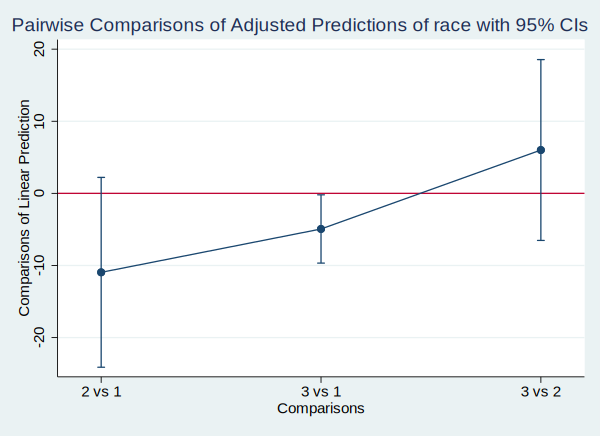

In [ ]:
quietly reg sbp i.race
margins race, pwcompare mcompare(bonferroni)
marginsplot, xdimension(_pw) unique yline(0) plotregion(margin(l=10 r=10))

## Linear regression with multiple covariates

In [ ]:
reg sbp i.sex i.race c.age


      Source |       SS           df       MS      Number of obs   =     1,266
-------------+----------------------------------   F(4, 1261)      =    123.17
       Model |  210554.174         4  52638.5436   Prob > F        =    0.0000
    Residual |  538908.806     1,261  427.366222   R-squared       =    0.2809
-------------+----------------------------------   Adj R-squared   =    0.2787
       Total |   749462.98     1,265  592.460854   Root MSE        =    20.673

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         sex |
       Male  |   5.441718   1.165406     4.67   0.000     3.155369    7.728066
             |
        race |
      Other  |  -5.695209   4.681681    -1.22   0.224    -14.87995    3.489533
      White  |  -6.578825   1.683873    -3.91   0.000    -9.882327   -3.275323
     

### Margins for age and sex




Predictive margins                              Number of obs     =      1,266
Model VCE    : OLS

Expression   : Linear prediction, predict()
1._at        : age             =          20
2._at        : age             =          30
3._at        : age             =          40
4._at        : age             =          50
5._at        : age             =          60

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     _at#sex |
   1#Female  |   107.1411   1.264075    84.76   0.000     104.6612     109.621
     1#Male  |   112.5828   1.289671    87.30   0.000     110.0527     115.113
   2#Female  |   114.5198   1.020415   112.23   0.000     112.5179    116.5217
     2#Male  |   119.9615   1.056442   113.55   0.000      117.889    122.0341
   3#Female  |   121.

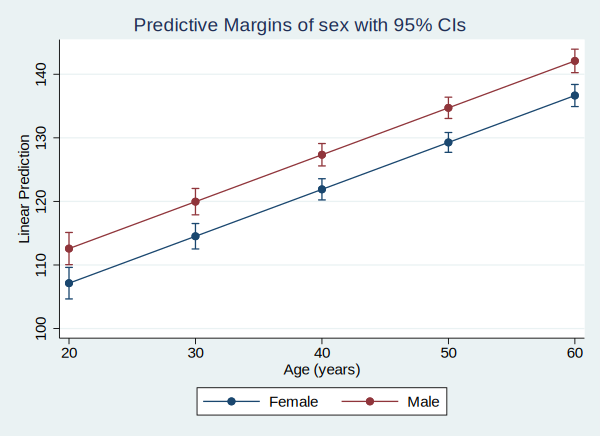

In [ ]:
quietly reg sbp i.sex i.race c.age
margins sex, at(age=(20(10)60)) vsquish
marginsplot

The predictions for each combination of age and sex are averaged over race.

### Margins for age and race




Predictive margins                              Number of obs     =      1,266
Model VCE    : OLS

Expression   : Linear prediction, predict()
1._at        : age             =          20
2._at        : age             =          30
3._at        : age             =          40
4._at        : age             =          50
5._at        : age             =          60

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    _at#race |
    1#Black  |    115.326   1.813503    63.59   0.000     111.7682    118.8838
    1#Other  |   109.6308   4.458924    24.59   0.000     100.8831    118.3785
    1#White  |   108.7472   1.175279    92.53   0.000     106.4415    111.0529
    2#Black  |   122.7047   1.664516    73.72   0.000     119.4392    125.9702
    2#Other  |   117.

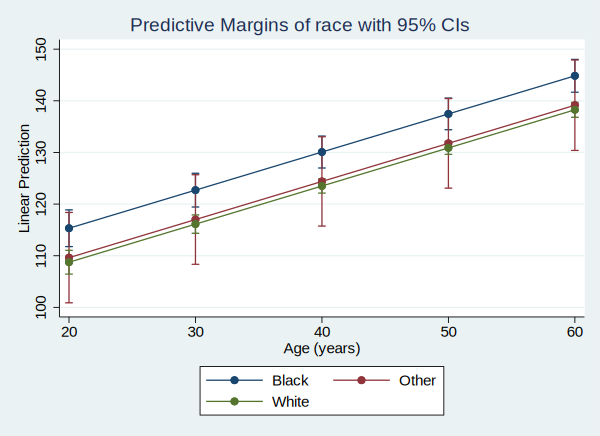

In [ ]:
quietly reg sbp i.sex i.race c.age
margins race, at(age=(20(10)60)) vsquish
marginsplot

The predictions for each combination of age and race are averaged over sex.

## Linear regression with interactions (moderation)

![](https://github.com/quaea/margins-interactions/blob/main/figs/moderation.jpg?raw=1)

### Interaction between age and sex

In [ ]:
reg sbp c.age i.sex c.age#i.sex


      Source |       SS           df       MS      Number of obs   =     1,266
-------------+----------------------------------   F(3, 1262)      =    171.78
       Model |  217302.842         3  72434.2806   Prob > F        =    0.0000
    Residual |  532160.138     1,262  421.679983   R-squared       =    0.2899
-------------+----------------------------------   Adj R-squared   =    0.2883
       Total |   749462.98     1,265  592.460854   Root MSE        =    20.535

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   .9091169   .0462875    19.64   0.000     .8183079    .9999259
             |
         sex |
       Male  |   23.81248    3.49797     6.81   0.000     16.95001    30.67496
             |
   sex#c.age |
       Male  |   -.382524   .0681831    -5.61   0.000    -.5162887   

The same output can be obtained by using `reg sbp c.age##i.sex`




Adjusted predictions                            Number of obs     =      1,266
Model VCE    : OLS

Expression   : Linear prediction, predict()
1._at        : age             =          20
2._at        : age             =          30
3._at        : age             =          40
4._at        : age             =          50
5._at        : age             =          60

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     _at#sex |
   1#Female  |   102.3113   1.541724    66.36   0.000     99.28663    105.3359
     1#Male  |   118.4733   1.647827    71.90   0.000     115.2405     121.706
   2#Female  |   111.4024   1.168512    95.34   0.000       109.11    113.6949
     2#Male  |   123.7392   1.244882    99.40   0.000     121.2969    126.1815
   3#Female  |   120.

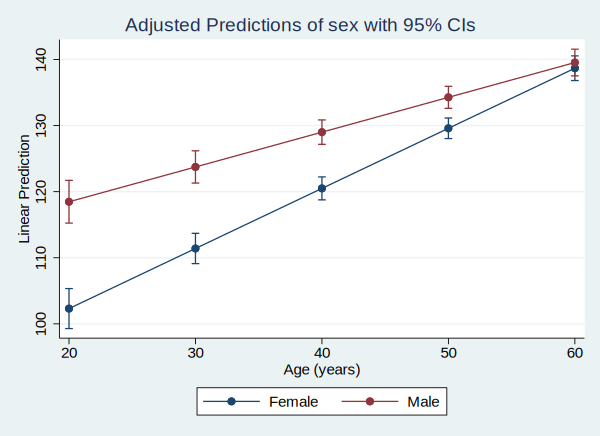

In [ ]:
quietly reg sbp c.age i.sex c.age#i.sex
margins sex, at(age=(20(10)60)) vsquish
marginsplot

### Interaction between age and race



      Source |       SS           df       MS      Number of obs   =     1,266
-------------+----------------------------------   F(5, 1260)      =     93.24
       Model |  202409.031         5  40481.8062   Prob > F        =    0.0000
    Residual |  547053.949     1,260  434.169801   R-squared       =    0.2701
-------------+----------------------------------   Adj R-squared   =    0.2672
       Total |   749462.98     1,265  592.460854   Root MSE        =    20.837

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   .8555534   .0935956     9.14   0.000      .671933    1.039174
             |
        race |
      Other  |   -10.3098   14.01752    -0.74   0.462    -37.81005    17.19044
      White  |   .4203122    5.05856     0.08   0.934    -9.503817    10.34444
             |
  ra

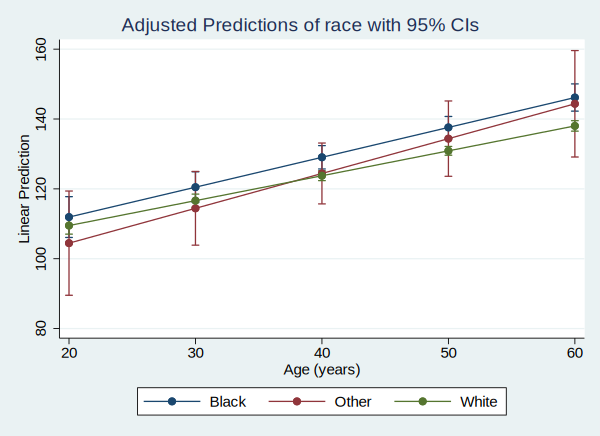

In [ ]:
reg sbp c.age##i.race
margins race, at(age=(20(10)60)) vsquish
marginsplot, legend(rows(1))

### F-test for interaction

In [ ]:
quietly reg sbp c.age##i.race
testparm c.age#i.race




 ( 1)  2.race#c.age = 0
 ( 2)  3.race#c.age = 0

       F(  2,  1260) =    1.35
            Prob > F =    0.2595


### Likelihood ratio test for interaction

In [ ]:
quietly regress sbp c.age i.race c.age#i.race
estimates store w_int
quietly regress sbp c.age i.race
estimates store no_int
lrtest w_int no_int







Likelihood-ratio test                                 LR chi2(2)  =      2.71
(Assumption: no_int nested in w_int)                  Prob > chi2 =    0.2578


### Continuous-by-continuous interactions

In [ ]:
reg sbp c.age##c.weight
quietly margins, at(age=(20(5)60) weight=(40(5)160)) saving(predictions.dta, replace) vsquish
use predictions.dta, clear
describe _margin _at1 _at2
rename _margin pr_sbp
rename _at1 age
rename _at2 weight
describe pr_sbp age weight



      Source |       SS           df       MS      Number of obs   =     1,265
-------------+----------------------------------   F(3, 1261)      =    226.17
       Model |  262182.286         3  87394.0953   Prob > F        =    0.0000
    Residual |  487252.185     1,261  386.401416   R-squared       =    0.3498
-------------+----------------------------------   Adj R-squared   =    0.3483
       Total |  749434.471     1,264  592.907018   Root MSE        =    19.657

------------------------------------------------------------------------------
         sbp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   .9478535   .1509158     6.28   0.000     .6517798    1.243927
      weight |    .593942   .1014167     5.86   0.000      .394978     .792906
             |
       c.age#|
    c.weight |  -.0032773   .0020846    -1.57   0.116     -.007367    .0008124
             |
    

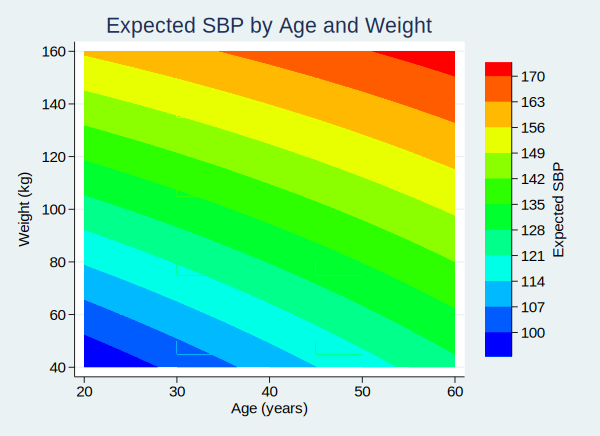

In [ ]:
tw (contour pr_sbp weight age, ccuts(100(7)170)), ///
    xlabel(20(10)60)    ///
    ylabel(40(20)160, angle(horizontal))  ///
    xtitle("Age (years)")  ///
    ytitle("Weight (kg)")  ///
    ztitle("Expected SBP")  ///
    title("Expected SBP by Age and Weight") 
